<a href="https://colab.research.google.com/github/shriyapalkar/hands_on-data-science-projects/blob/main/IPL_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
df=pd.read_csv('/content/innings_deliveries.csv')
df

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_out,wicket_kind,fielders
0,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
1,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,1,0,1,NaN,NaN,[]
2,Royal Challengers Bengaluru,0,F du Plessis,I Sharma,V Kohli,1,0,1,NaN,NaN,[]
3,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
4,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,2,0,2,NaN,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...
242,Delhi Capitals,18,Kuldeep Yadav,Mohammed Siraj,I Sharma,1,0,1,NaN,NaN,[]
243,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,1,1,NaN,NaN,[]
244,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,NaN,NaN,[]
245,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,NaN,NaN,[]


<Axes: xlabel='over', ylabel='runs_total'>

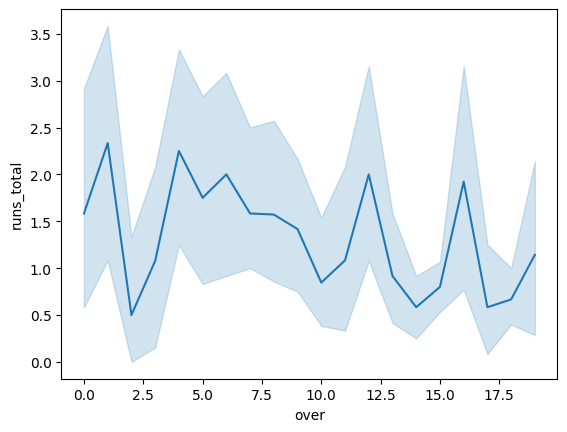

In [ ]:
sns.lineplot(df,x='over',y='runs_total')

In [ ]:
fig = px.bar(df, x='team', title='runs_total')
fig.show()

In [ ]:
fig = px.line(df, x='over', title='Distribution of over')
fig.show()

In [ ]:


fig = px.histogram(df, x='runs_total', color='team')
fig.show()

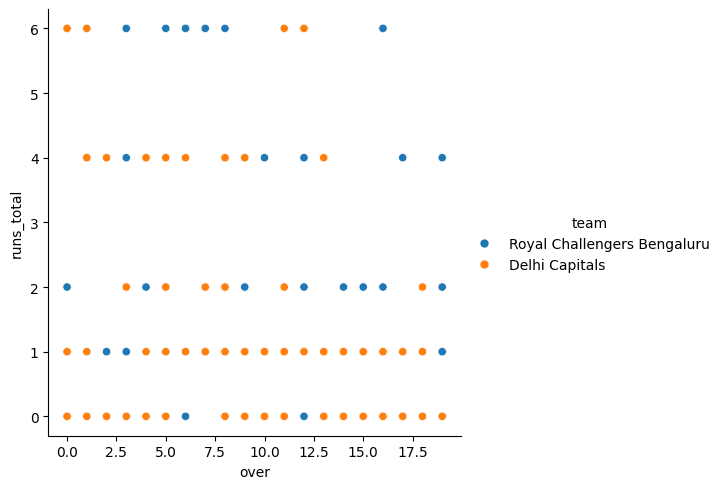

In [ ]:


sns.relplot(data=df, x='over', y='runs_total', hue='team')
plt.show()

In [ ]:


fig = px.pie(df, values='runs_total', names='team', title='Distribution of runs_total by team')
fig.show()

In [ ]:


fig = px.scatter(df, x='over', y='runs_total', color='team')
fig.show()

In [ ]:


fig = px.bar(df, x='team', y='runs_total', title='Runs Total by Team')
fig.show()

In [ ]:
sns.set_style("whitegrid")
df=pd.read_csv('/content/innings_deliveries.csv');
df

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_out,wicket_kind,fielders
0,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
1,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,1,0,1,NaN,NaN,[]
2,Royal Challengers Bengaluru,0,F du Plessis,I Sharma,V Kohli,1,0,1,NaN,NaN,[]
3,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
4,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,2,0,2,NaN,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...
242,Delhi Capitals,18,Kuldeep Yadav,Mohammed Siraj,I Sharma,1,0,1,NaN,NaN,[]
243,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,1,1,NaN,NaN,[]
244,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,NaN,NaN,[]
245,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,NaN,NaN,[]


In [ ]:
# data preparation for run distribution per over
#for the sport related data always find distribution
#for example cricket
#In case of cricket, to find run distribution for over we have to aggregate total runs over the sum.
#And reset index of remaning column now this will give the exat run distribution in terms of line plot.
run_distribution = df.groupby(['team', 'over']).agg({'runs_total': 'sum'}).reset_index()

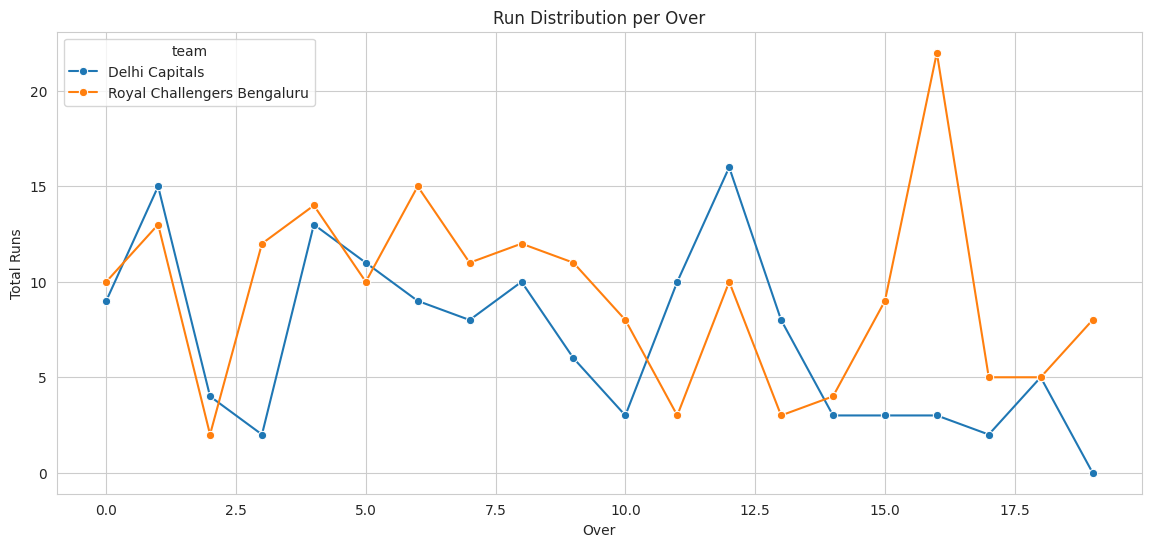

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='over', y='runs_total', hue='team', marker='o',data=run_distribution)
plt.title('Run Distribution per Over')
plt.xlabel('Over')
plt.ylabel('Total Runs')
plt.show()

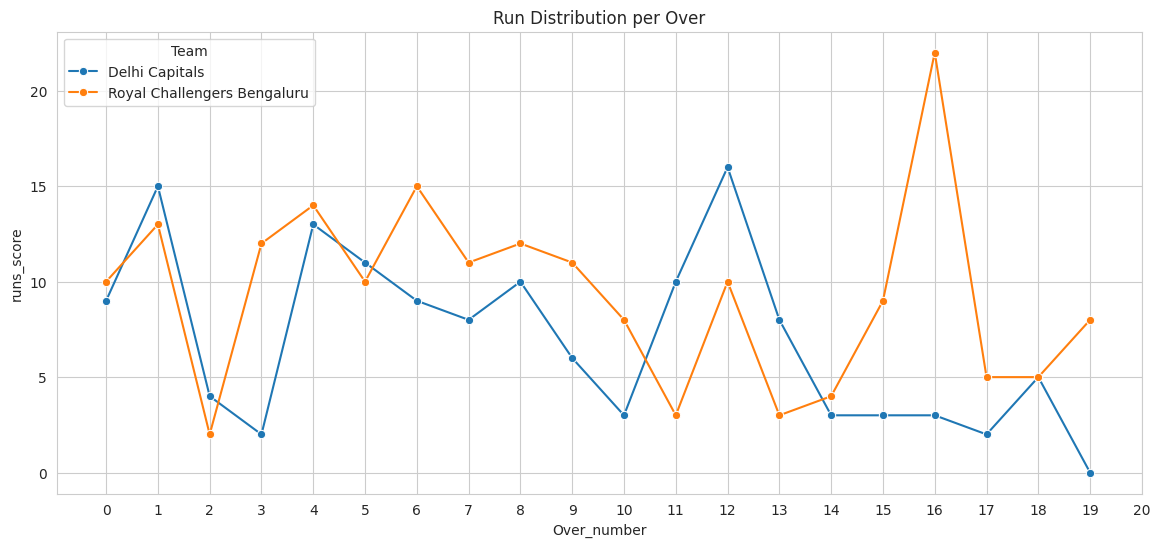

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='over', y='runs_total', hue='team', marker='o',data=run_distribution)
plt.title('Run Distribution per Over')
plt.xlabel('Over_number')
plt.ylabel('runs_score')
plt.xticks(range(0, 21))
plt.legend(title='Team')
plt.show()

The scoring rate for each team shows the flutuation throughout their innings,with spikes indicating overs with high scoring,likely due to fours or sixes.
RCB appears to have couple of overs with significantly high runs.
Now we we will analyse top score from each team to highlight individual performances.

In [ ]:
top_scorers = df.groupby(['team', 'batter']).agg({'runs_batter': 'sum'}).reset_index().sort_values(by='runs_batter', ascending=False)

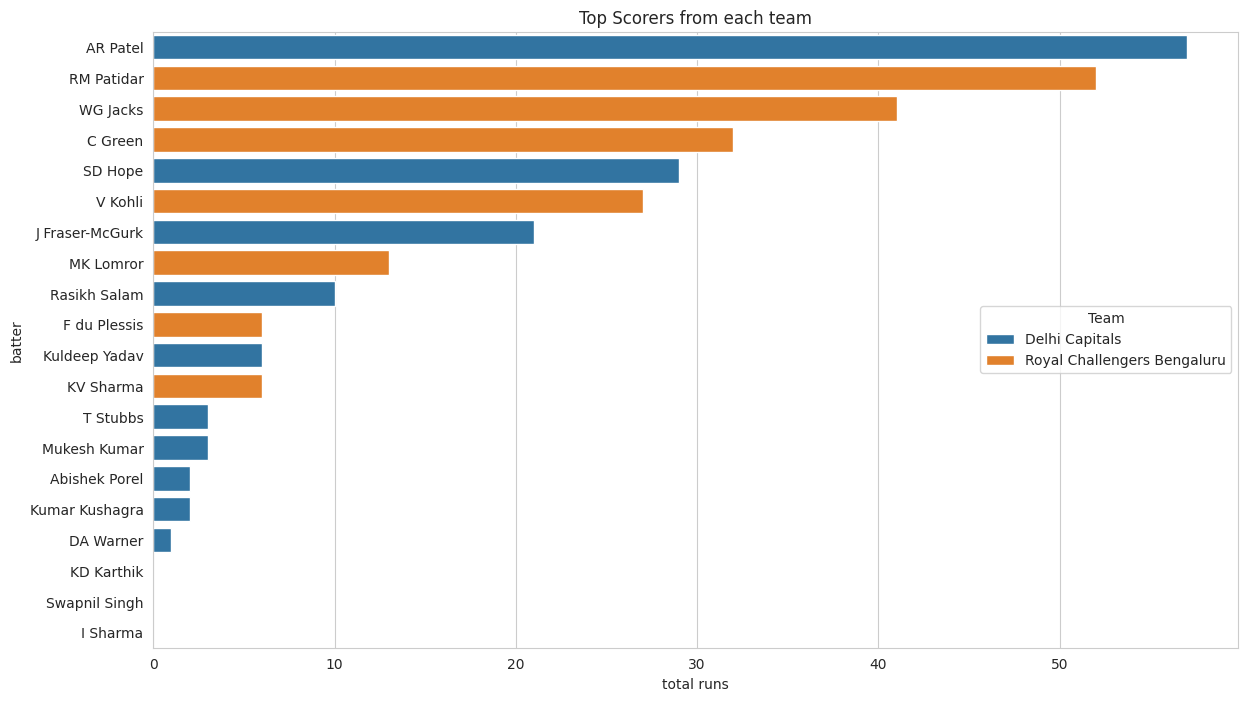

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(x='runs_batter',y='batter',hue='team', data=top_scorers,dodge=False)
plt.title('Top Scorers from each team')
plt.xlabel('total runs')
plt.ylabel('batter')
plt.legend(title='Team',loc='center right')
plt.show()


AR Patel from Delhi Capitals is the top scorer of the match, significantly outscoring others with a little over 50 runs.
RM Patidar is the top scorer for Royal Challengers Bangalore, closely approaching 50 runs.
The graph displays a diverse contribution from both teams, with several players from both sides contributing notable scores.

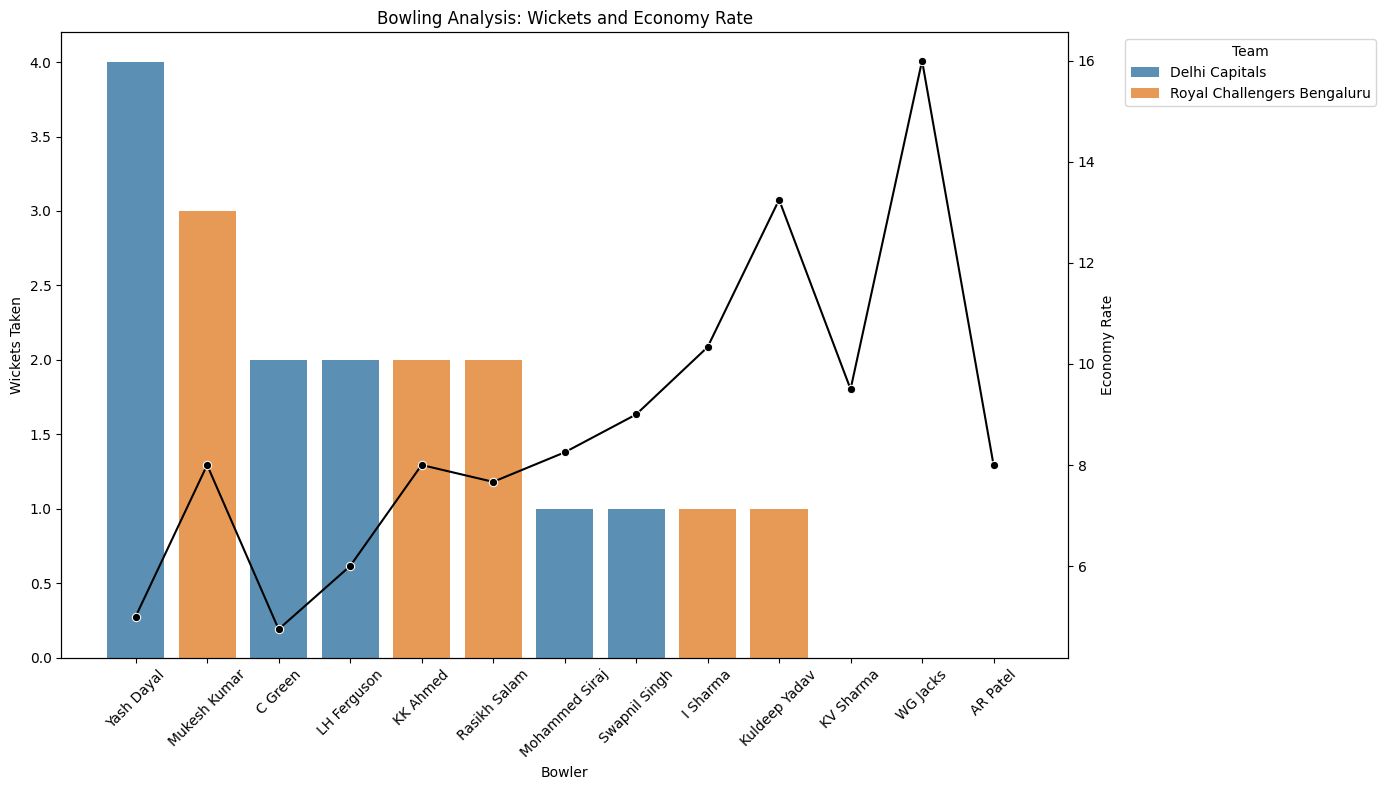

In [ ]:
# preparing data for bowling analysis
df['wickets_taken'] = df['wicket_kind'].notna().astype(int)
bowling_stats = df.groupby(['team', 'bowler']).agg({'runs_total': 'sum', 'wickets_taken': 'sum', 'over': 'nunique'}).reset_index()

# calculating economy rate (total runs conceded / number of overs bowled)
bowling_stats['economy_rate'] = bowling_stats['runs_total'] / bowling_stats['over']

# sorting the data for better visualization
bowling_stats_sorted = bowling_stats.sort_values(by='wickets_taken', ascending=False)

# prepare the DataFrame for plotting
bowling_stats_sorted['wickets_taken'] = df['wicket_kind'].notna().astype(int)
bowling_stats = df.groupby(['team', 'bowler']).agg({'runs_total': 'sum', 'wickets_taken': 'sum', 'over': 'nunique'}).reset_index()
bowling_stats['economy_rate'] = bowling_stats['runs_total'] / bowling_stats['over']
bowling_stats_sorted = bowling_stats.sort_values(by='wickets_taken', ascending=False)

# create the plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for wickets
sns.barplot(data=bowling_stats_sorted, x='bowler', y='wickets_taken', hue='team', ax=ax1, alpha=0.8)
ax1.set_ylabel('Wickets Taken')
ax1.set_xlabel('Bowler')
ax1.set_title('Bowling Analysis: Wickets and Economy Rate')
ax1.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')

for item in ax1.get_xticklabels():
    item.set_rotation(45)

ax2 = ax1.twinx()
sns.lineplot(data=bowling_stats_sorted, x='bowler', y='economy_rate', marker='o', sort=False, ax=ax2, color='black')
ax2.set_ylabel('Economy Rate')

plt.tight_layout()
plt.show()

The bbox_to_anchor parameter specifies the legend's position. The tuple (1.05, 1) positions the legend just outside the plot's right edge. The loc parameter determines where the legend's anchor point should be. 'upper left' means the upper left corner of the legend will be at the position specified by bbox_to_anchor

Wickets Taken: The bars indicate the number of wickets each bowler took during the match. The height of the bars reflects how successful the bowlers were in terms of taking wickets. Bowlers from both teams contributed to taking wickets, with some notable performances that stand out due to higher bars.
Economy Rate: The line graph overlaid on the bar graph shows the economy rate (number of runs conceded per over) of each bowler. The economy rate is crucial as it indicates how economically a bowler has bowled in terms of runs given away.

let’s analyze the types of dismissals that occurred during the match to understand how most wickets were taken (e.g., #caught, bowled, run out). This can provide insights into the nature of the pitch and the playing conditions. We’ll visualize #this using a pie chart

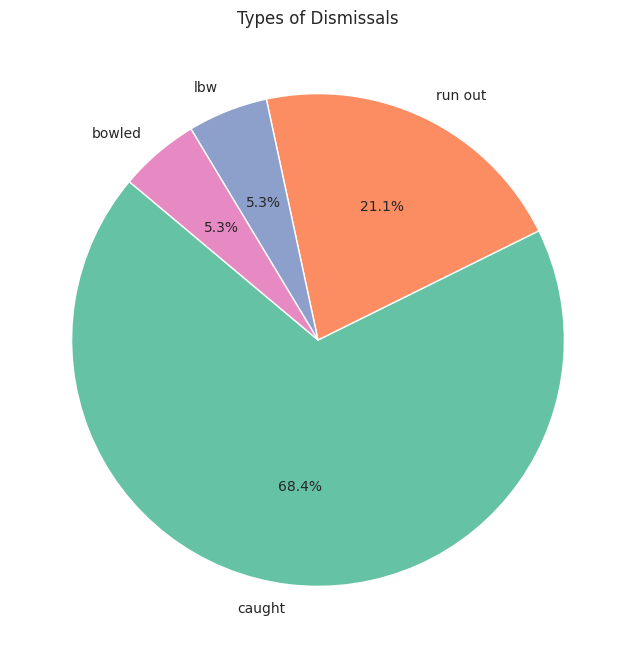

In [ ]:
# counting dismissal types
dismissal_types = df['wicket_kind'].dropna().value_counts()

plt.figure(figsize=(8, 8))
plt.pie(dismissal_types, labels=dismissal_types.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Types of Dismissals')
plt.show()

Partnerships Analysis by calculating and visualizing the most productive batting partnerships in the match.

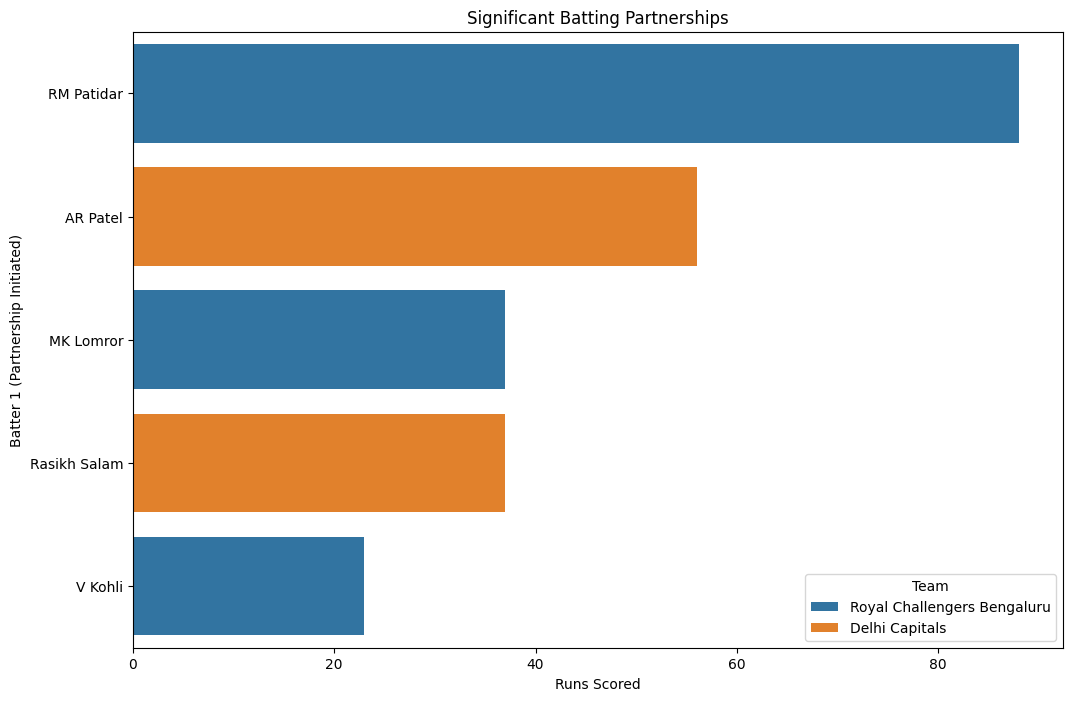

In [ ]:
# function to calculate partnerships
def calculate_partnerships(df):
    partnerships = []
    current_partnership = {}
    for i, row in df.iterrows():
        if i == 0 or (row['batter'] not in current_partnership.values()):
            if current_partnership:
                partnerships.append(current_partnership)
            current_partnership = {
                'team': row['team'],
                'batter1': row['batter'],
                'batter2': row['non_striker'],
                'runs': 0,
                'balls': 0
            }
        current_partnership['runs'] += row['runs_total']
        current_partnership['balls'] += 1
        if 'player_out' in row and pd.notna(row['player_out']):
            if row['player_out'] == current_partnership['batter1'] or row['player_out'] == current_partnership['batter2']:
                partnerships.append(current_partnership)
                current_partnership = {}
    # append the last partnership if not ended by a wicket
    if current_partnership:
        partnerships.append(current_partnership)
    return partnerships

# calculate partnerships
partnerships_data = calculate_partnerships(df)
partnerships_df = pd.DataFrame(partnerships_data)

# filter out significant partnerships (e.g., partnerships with more than 20 runs)
significant_partnerships = partnerships_df[partnerships_df['runs'] > 20]

# sort by highest runs
significant_partnerships = significant_partnerships.sort_values(by='runs', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=significant_partnerships, x='runs', y='batter1', hue='team', dodge=False)
plt.title('Significant Batting Partnerships')
plt.xlabel('Runs Scored')
plt.ylabel('Batter 1 (Partnership Initiated)')
plt.legend(title='Team')
plt.show()

In [ ]:
# calculate runs and balls faced for each batter
batter_stats =df.groupby('batter').agg({'runs_batter': 'sum', 'over': 'count'}).rename(columns={'over': 'balls_faced'}).reset_index()

In [ ]:


# calculate strike rate for each batter (runs per 100 balls)
batter_stats['strike_rate'] = (batter_stats['runs_batter'] / batter_stats['balls_faced'])*100
# sorting batters by their strike rate
batter_stats_sorted = batter_stats.sort_values(by='strike_rate', ascending=False)
# displaying calculated strike rates along with runs scored and balls faced
batter_stats_sorted.head(10)

,batter,runs_batter,balls_faced,strike_rate
6,J Fraser-McGurk,21,8,262.500000
18,V Kohli,27,14,192.857143
13,RM Patidar,52,34,152.941176
8,KV Sharma,6,4,150.000000
0,AR Patel,57,40,142.500000
19,WG Jacks,41,30,136.666667
2,C Green,32,24,133.333333
11,MK Lomror,13,10,130.000000
15,SD Hope,29,24,120.833333
4,F du Plessis,6,7,85.714286


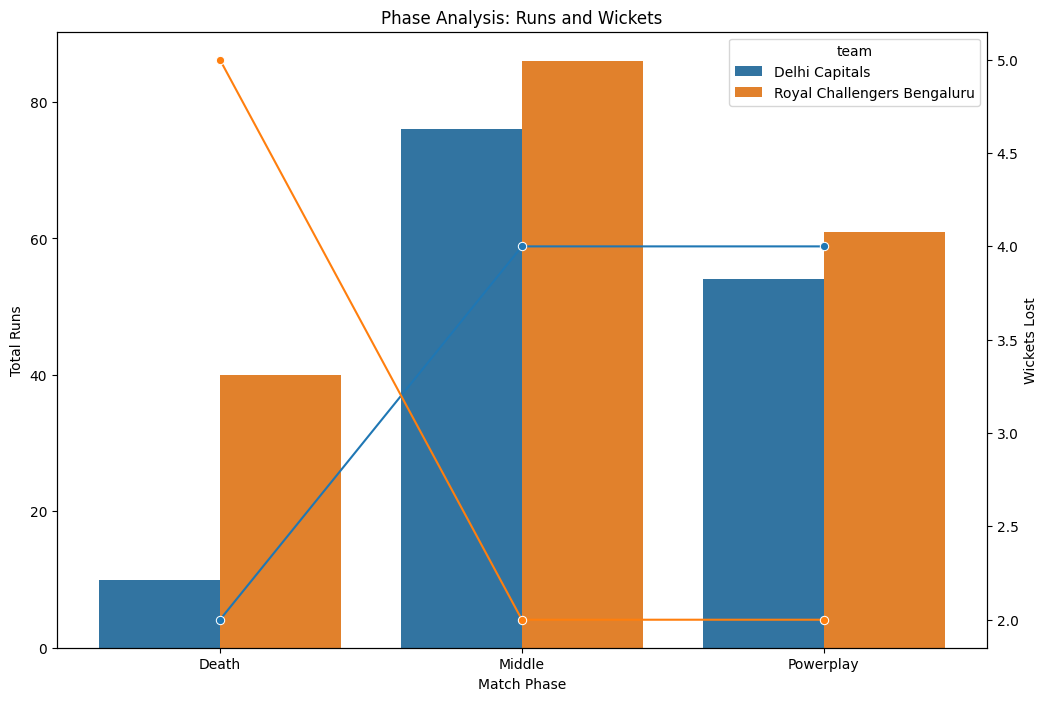

In [ ]:
# function to classify the phase of the game based on the over number
def classify_phase(over):
    if over < 6:
        return 'Powerplay'
    elif over < 16:
        return 'Middle'
    else:
        return 'Death'

# adding phase information to the dataframe
df['phase'] = df['over'].apply(classify_phase)

# grouping data by phase and team to calculate runs and wickets
phase_analysis = df.groupby(['team', 'phase']).agg({'runs_total': 'sum', 'wickets_taken': 'sum', 'over': 'count'}).rename(columns={'over': 'balls'}).reset_index()

# calculating the run rate
phase_analysis['run_rate'] = (phase_analysis['runs_total'] / phase_analysis['balls']) * 6

# plotting the phase analysis
fig, ax1 = plt.subplots(figsize=(12, 8))

# bar plot for runs scored in each phase
sns.barplot(data=phase_analysis, x='phase', y='runs_total', hue='team', ax=ax1)
ax1.set_title('Phase Analysis: Runs and Wickets')
ax1.set_ylabel('Total Runs')
ax1.set_xlabel('Match Phase')

# line plot for wickets lost
ax2 = ax1.twinx()
sns.lineplot(data=phase_analysis, x='phase', y='wickets_taken', hue='team', marker='o', ax=ax2, legend=False)
ax2.set_ylabel('Wickets Lost')

plt.show()

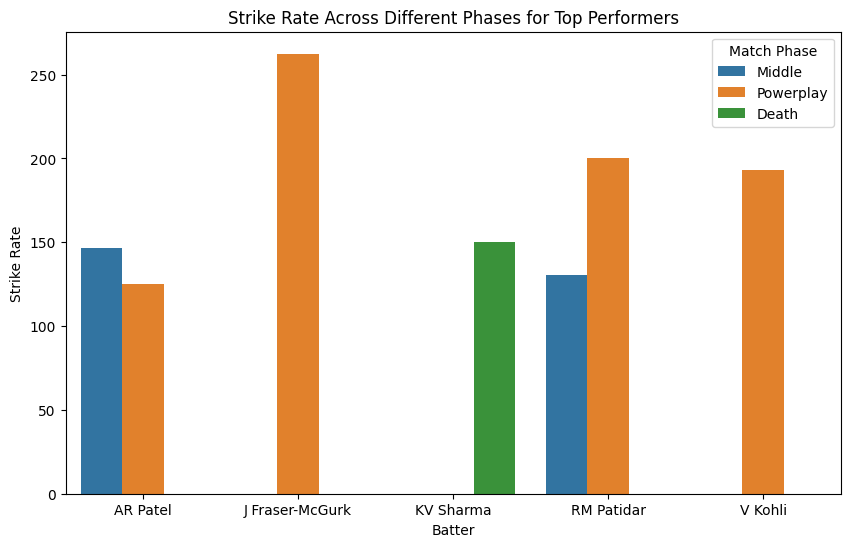

In [ ]:
# merging phase information with batter stats
batter_phase_stats = df.groupby(['batter', 'phase']).agg({'runs_batter': 'sum', 'over': 'count'}).rename(columns={'over': 'balls_faced'}).reset_index()

# calculate strike rate for each batter-phase combination
batter_phase_stats['strike_rate'] = (batter_phase_stats['runs_batter'] / batter_phase_stats['balls_faced']) * 100

# filtering for top performers based on overall strike rate
top_performers = batter_stats_sorted.head(5)['batter']
batter_phase_stats_top = batter_phase_stats[batter_phase_stats['batter'].isin(top_performers)]

# plotting strike rate across different phases for top performers
plt.figure(figsize=(10, 6))
sns.barplot(data=batter_phase_stats_top, x='batter', y='strike_rate', hue='phase')
plt.title('Strike Rate Across Different Phases for Top Performers')
plt.xlabel('Batter')
plt.ylabel('Strike Rate')
plt.legend(title='Match Phase')
plt.show()

<ipython-input-19-5f4c06fd5665>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-19-5f4c06fd5665>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



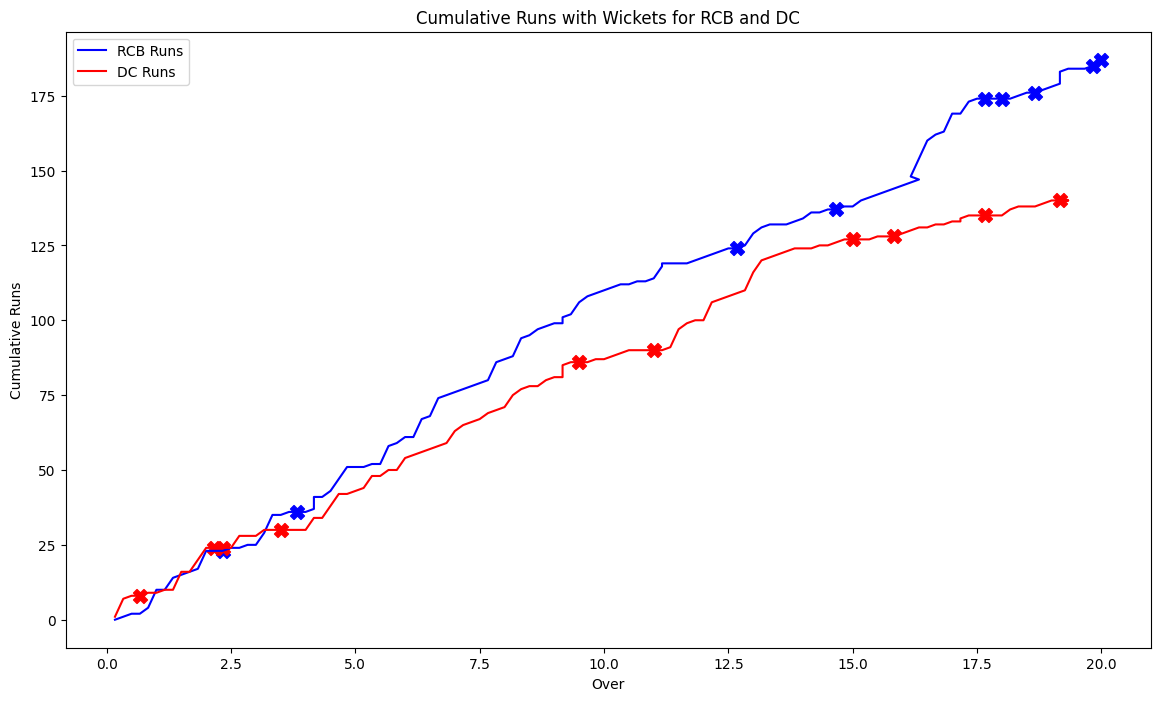

In [ ]:
# calculate cumulative runs and wickets for each ball for both teams
df['cumulative_runs'] = df.groupby('team')['runs_total'].cumsum()
df['cumulative_wickets'] = df.groupby('team')['wickets_taken'].cumsum()

# separate data for both teams
rcb_deliveries = df[df['team'] == 'Royal Challengers Bengaluru']
dc_deliveries = df[df['team'] == 'Delhi Capitals']

# calculating overs for cumulative analysis
rcb_deliveries['over_ball'] = rcb_deliveries['over'] + (rcb_deliveries.groupby('over').cumcount() + 1) / 6
dc_deliveries['over_ball'] = dc_deliveries['over'] + (dc_deliveries.groupby('over').cumcount() + 1) / 6

# plotting cumulative run rates and wickets
fig, ax = plt.subplots(figsize=(14, 8))

# plot for RCB
ax.plot(rcb_deliveries['over_ball'], rcb_deliveries['cumulative_runs'], color='blue', label='RCB Runs')
ax.scatter(rcb_deliveries[rcb_deliveries['wickets_taken'] == 1]['over_ball'], rcb_deliveries[rcb_deliveries['wickets_taken'] == 1]['cumulative_runs'], color='blue', marker='X', s=100)

# plot for DC
ax.plot(dc_deliveries['over_ball'], dc_deliveries['cumulative_runs'], color='red', label='DC Runs')
ax.scatter(dc_deliveries[dc_deliveries['wickets_taken'] == 1]['over_ball'], dc_deliveries[dc_deliveries['wickets_taken'] == 1]['cumulative_runs'], color='red', marker='X', s=100)

ax.set_title('Cumulative Runs with Wickets for RCB and DC')
ax.set_xlabel('Over')
ax.set_ylabel('Cumulative Runs')
ax.legend()
plt.show()